In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Load và Preview Data

In [2]:
# Load JSONL data
data_path = r'c:\Users\AN\Downloads\20251214155845_10 (1).jsonl'

jobs = []
with open(data_path, 'r', encoding='utf-8') as f:
    for line in f:
        jobs.append(json.loads(line))

df = pd.DataFrame(jobs)
print(f"Total jobs loaded: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Total jobs loaded: 10

Columns: ['url_hash', 'job_url', 'title', 'datetime', 'detail_title', 'detail_salary', 'detail_location', 'detail_experience', 'deadline', 'tags', 'desc_mota', 'desc_yeucau', 'desc_quyenloi', 'working_addresses', 'working_times', 'company_url_from_job']


,url_hash,job_url,title,datetime,detail_title,detail_salary,detail_location,detail_experience,deadline,tags,desc_mota,desc_yeucau,desc_quyenloi,working_addresses,working_times,company_url_from_job
0,b5de35fb45e81e2715ce9332f0e18df4141faf5c121c2f...,viec-lam/tech-lead-backend-developer-java/1553...,Tech Lead Backend Developer (Java),2025-12-14T15:58:45.021758,Tech Lead Backend Developer ( Java ),Thoả thuận,Hà Nội,5 năm,10/01/2026,5 năm kinh nghiệm; Đại Học trở lên; Backend De...,"Phối hợp, hỗ trợ cùng với Technical Lead trong...",1. Kinh nghiệm làm việc Có tối thiểu từ 5 năm ...,1. Cộng đồng những người làm nghề chính trực v...,- Hà Nội: Phường Thanh Xuân,None,https://www.topcv.vn/cong-ty/fecredit/81412.ht...
1,8138dbb30a0e8c7949a6ac655c1945dc3bb63bec8e18c2...,viec-lam/chuyen-vien-van-hanh-he-thong/1899099...,Chuyên Viên Vận Hành Hệ Thống,2025-12-14T15:58:45.021778,Chuyên Viên Vận Hành Hệ Thống,15 - 20 triệu,Hà Nội,2 năm,09/01/2026,2 năm kinh nghiệm; Cao Đẳng trở lên; Tuổi 25 -...,"-Quản lý, vận hành và giám sát toàn bộ hệ thốn...","-Tốt nghiệp Cao đẳng/Đại học ngành CNTT, Mạng ...","- Mức lương: 15,000,000 - 20,000,000 VNĐ (Có t...","- Hà Nội: H18+19 Ngõ 68 Trung Kính, Cầu giấy, ...",Thứ 2 - Thứ 6 (từ 08:00 đến 17:30); Sáng thứ 7...,https://www.topcv.vn/cong-ty/fecredit/81412.ht...
2,902743230ed910df0d8cdbfcf6a809e5e76e45393caa81...,viec-lam/net-developer-leader-tu-1-nam-kinh-ng...,.NET Developer Leader - Từ 1 Năm Kinh Nghiệm,2025-12-14T15:58:45.021785,. NET Developer Leader - Từ 1 Năm Kinh Nghiệm,Tới 40 triệu,Hà Nội,1 năm,07/01/2026,1 năm kinh nghiệm; Đại Học trở lên; Nghỉ thứ 7...,Chịu trách nhiệm dẫn dắt và quản lý nhóm phát ...,Tốt nghiệp Đại học chuyên ngành Công nghệ thôn...,"Chế độ lương thưởng hấp dẫn, Chế độ BHYT, BHXH...","- Hà Nội: Tòa 319 Bộ Quốc Phòng, 63 Lê Văn Lươ...",Thứ 2 - Thứ 6 (từ 08:00 đến 17:00),https://www.topcv.vn/cong-ty/fecredit/81412.ht...
3,e96cdcc0a1f7e29e022414dbd79e25a4347a496cb174b3...,brand/educa/tuyen-dung/truong-phong-phat-trien...,Trưởng Phòng Phát Triển Phần Mềm- Technical Le...,2025-12-14T15:58:45.021792,Tin tuyển dụng,None,None,None,None,5 năm kinh nghiệm; Đại Học trở lên; Chuyên môn...,None,None,None,None,None,https://www.topcv.vn/cong-ty/fecredit/81412.ht...
4,b919b92a3b0446bf8f2f6f33f0474d1125d9edfe5e7feb...,viec-lam/truong-phong-cong-nghe-thong-tin/1976...,Trưởng Phòng Công Nghệ Thông Tin,2025-12-14T15:58:45.021799,Trưởng Phòng Công Nghệ Thông Tin,Thoả thuận,Hồ Chí Minh,5 năm,04/01/2026,5 năm kinh nghiệm; Đại Học trở lên; Nam; Techn...,Xây dựng và triển khai chiến lược công nghệ củ...,Tốt nghiệp đại học trở lên chuyên ngành Công n...,Thu nhập hấp dẫn: Thoả Thuận. Được tham gia nh...,"- Hồ Chí Minh: 97/11 Trần Não, KP4, Phường An ...",Thứ 2 - Thứ 6 (từ 08:30 đến 17:30); Giờ hành c...,https://www.topcv.vn/cong-ty/fecredit/81412.ht...


In [3]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url_hash              10 non-null     object
 1   job_url               10 non-null     object
 2   title                 10 non-null     object
 3   datetime              10 non-null     object
 4   detail_title          10 non-null     object
 5   detail_salary         9 non-null      object
 6   detail_location       9 non-null      object
 7   detail_experience     9 non-null      object
 8   deadline              9 non-null      object
 9   tags                  10 non-null     object
 10  desc_mota             9 non-null      object
 11  desc_yeucau           9 non-null      object
 12  desc_quyenloi         9 non-null      object
 13  working_addresses     9 non-null      object
 14  working_times         7 non-null      object
 15  company_url_from_job  10 non-null     objec

## 2. Data Cleaning & Preprocessing

In [4]:
# Missing values analysis
missing_stats = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Statistics:")
print(missing_stats[missing_stats['Missing_Count'] > 0])

Missing Values Statistics:
                   Missing_Count  Missing_Percentage
working_times                  3                30.0
detail_location                1                10.0
detail_salary                  1                10.0
detail_experience              1                10.0
desc_mota                      1                10.0
desc_yeucau                    1                10.0
deadline                       1                10.0
working_addresses              1                10.0
desc_quyenloi                  1                10.0


In [5]:
# Clean and parse salary
def parse_salary(salary_str):
    """Extract min, max, avg salary from string"""
    if pd.isna(salary_str) or salary_str == 'Thoả thuận':
        return None, None, None
    
    # Remove 'triệu', 'VNĐ', etc.
    salary_str = salary_str.lower().replace('triệu', '').replace('vnđ', '').replace('vnd', '').strip()
    
    # Parse range: "15 - 20"
    if '-' in salary_str:
        parts = salary_str.split('-')
        try:
            min_sal = float(parts[0].strip())
            max_sal = float(parts[1].strip())
            avg_sal = (min_sal + max_sal) / 2
            return min_sal, max_sal, avg_sal
        except:
            return None, None, None
    
    # Parse "Tới 40 triệu" or "Trên 50"
    elif 'tới' in salary_str or 'đến' in salary_str or 'trên' in salary_str:
        nums = re.findall(r'\d+', salary_str)
        if nums:
            val = float(nums[0])
            return None, val, val
    
    return None, None, None

# Apply parsing
df[['salary_min', 'salary_max', 'salary_avg']] = df['detail_salary'].apply(
    lambda x: pd.Series(parse_salary(x))
)

print(f"\nSalary data available: {df['salary_avg'].notna().sum()} / {len(df)} jobs")
df[['detail_salary', 'salary_min', 'salary_max', 'salary_avg']].head(10)


Salary data available: 3 / 10 jobs


,detail_salary,salary_min,salary_max,salary_avg
0,Thoả thuận,NaN,NaN,NaN
1,15 - 20 triệu,15.0,20.0,17.5
2,Tới 40 triệu,NaN,40.0,40.0
3,None,NaN,NaN,NaN
4,Thoả thuận,NaN,NaN,NaN
5,Thoả thuận,NaN,NaN,NaN
6,Thoả thuận,NaN,NaN,NaN
7,Thoả thuận,NaN,NaN,NaN
8,Thoả thuận,NaN,NaN,NaN
9,75 - 110 triệu,75.0,110.0,92.5


In [6]:
# Parse experience years
def parse_experience(exp_str):
    """Extract years of experience"""
    if pd.isna(exp_str):
        return None
    
    exp_str = exp_str.lower()
    
    # Extract number
    nums = re.findall(r'\d+', exp_str)
    if nums:
        return float(nums[0])
    
    # Handle special cases
    if 'trên' in exp_str:
        nums = re.findall(r'\d+', exp_str)
        return float(nums[0]) if nums else 5
    
    return None

df['experience_years'] = df['detail_experience'].apply(parse_experience)

print(f"\nExperience data available: {df['experience_years'].notna().sum()} / {len(df)} jobs")
df[['detail_experience', 'experience_years']].value_counts().head(10)


Experience data available: 9 / 10 jobs


detail_experience  experience_years
5 năm              5.0                 4
1 năm              1.0                 2
Trên 5 năm         5.0                 2
2 năm              2.0                 1
Name: count, dtype: int64

In [7]:
# Parse tags into list
df['tags_list'] = df['tags'].apply(
    lambda x: [t.strip() for t in x.split(';')] if pd.notna(x) else []
)

# Count tags
all_tags = []
for tags in df['tags_list']:
    all_tags.extend(tags)

print(f"\nTotal unique tags: {len(set(all_tags))}")
print(f"Most common tags:")
Counter(all_tags).most_common(20)


Total unique tags: 25
Most common tags:


[('Đại Học trở lên', 8),
 ('Technical Leader', 8),
 ('5 năm kinh nghiệm', 5),
 ('IT - Phần mềm', 4),
 ('IT - Phần cứng và máy tính', 3),
 ('Nam', 3),
 ('Cao Đẳng trở lên', 2),
 ('Bảo hiểm xã hội', 2),
 ('1 năm kinh nghiệm', 2),
 ('Nghỉ thứ 7', 2),
 ('Trên 5 năm kinh nghiệm', 2),
 ('Backend Developer', 1),
 ('2 năm kinh nghiệm', 1),
 ('Tuổi 25 - 45', 1),
 ('Du lịch hàng năm', 1),
 ('Thưởng tháng 13', 1),
 ('Chuyên môn Technical Leader', 1),
 ('Tiếng Anh Đọc hiểu', 1),
 ('Tiếng Anh Giao tiếp cơ bản', 1),
 ('An ninh mạng', 1)]

## 3. Descriptive Statistics

In [8]:
# Salary statistics
salary_stats = df['salary_avg'].describe()
print("Salary Statistics (in millions VND):")
print(salary_stats)
print(f"\nMedian salary: {df['salary_avg'].median():.1f} million VND")
print(f"Mode salary: {df['salary_avg'].mode().values if not df['salary_avg'].mode().empty else 'N/A'}")

Salary Statistics (in millions VND):
count     3.000000
mean     50.000000
std      38.487011
min      17.500000
25%      28.750000
50%      40.000000
75%      66.250000
max      92.500000
Name: salary_avg, dtype: float64

Median salary: 40.0 million VND
Mode salary: [17.5 40.  92.5]


In [9]:
# Experience statistics
exp_stats = df['experience_years'].describe()
print("\nExperience Statistics (in years):")
print(exp_stats)
print(f"\nMedian experience: {df['experience_years'].median():.1f} years")
print(f"Mode experience: {df['experience_years'].mode().values if not df['experience_years'].mode().empty else 'N/A'}")


Experience Statistics (in years):
count    9.000000
mean     3.777778
std      1.855921
min      1.000000
25%      2.000000
50%      5.000000
75%      5.000000
max      5.000000
Name: experience_years, dtype: float64

Median experience: 5.0 years
Mode experience: [5.]


In [10]:
# Location distribution
location_dist = df['detail_location'].value_counts()
print("\nTop Locations:")
print(location_dist.head(10))

# Percentage
print("\nLocation Distribution (%):")
print((location_dist / len(df) * 100).head(10).round(2))


Top Locations:
detail_location
Hà Nội                  3
Hồ Chí Minh             3
Đà Nẵng & 3 nơi khác    1
Hà Nội , Hồ Chí Minh    1
Đà Nẵng                 1
Name: count, dtype: int64

Location Distribution (%):
detail_location
Hà Nội                  30.0
Hồ Chí Minh             30.0
Đà Nẵng & 3 nơi khác    10.0
Hà Nội , Hồ Chí Minh    10.0
Đà Nẵng                 10.0
Name: count, dtype: float64


## 4. Correlation Analysis

Correlation between Salary and Experience: 0.858


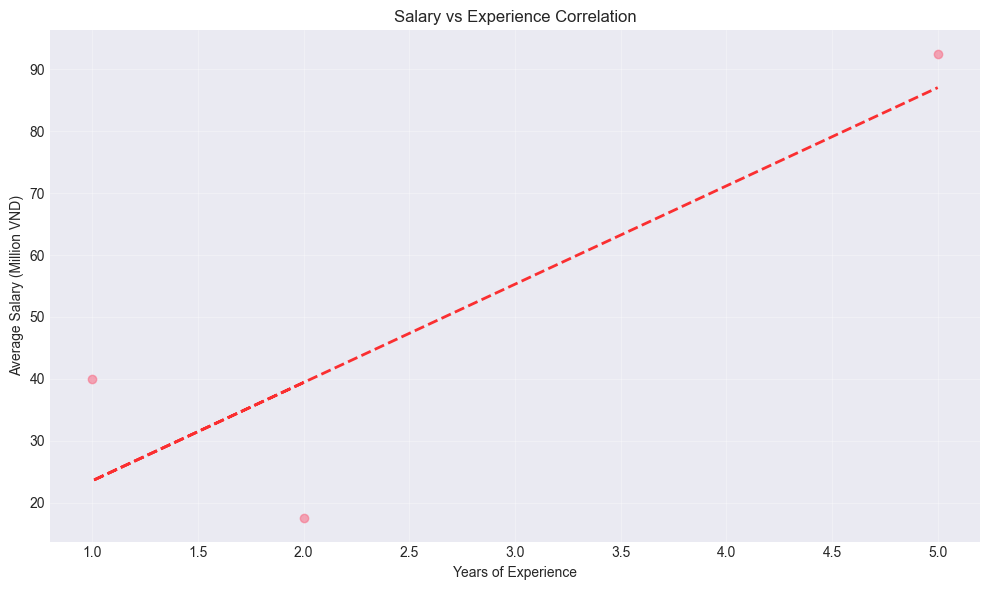

In [11]:
# Salary vs Experience correlation
valid_data = df[['salary_avg', 'experience_years']].dropna()

if len(valid_data) > 0:
    correlation = valid_data['salary_avg'].corr(valid_data['experience_years'])
    print(f"Correlation between Salary and Experience: {correlation:.3f}")
    
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(valid_data['experience_years'], valid_data['salary_avg'], alpha=0.6)
    plt.xlabel('Years of Experience')
    plt.ylabel('Average Salary (Million VND)')
    plt.title('Salary vs Experience Correlation')
    
    # Add trend line
    z = np.polyfit(valid_data['experience_years'], valid_data['salary_avg'], 1)
    p = np.poly1d(z)
    plt.plot(valid_data['experience_years'], p(valid_data['experience_years']), "r--", alpha=0.8, linewidth=2)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for correlation analysis")

In [12]:
# Salary by location
salary_by_location = df.groupby('detail_location')['salary_avg'].agg(['mean', 'median', 'count']).round(2)
salary_by_location = salary_by_location[salary_by_location['count'] >= 2].sort_values('mean', ascending=False)

print("\nSalary Statistics by Location (min 2 jobs):")
print(salary_by_location.head(10))


Salary Statistics by Location (min 2 jobs):
                  mean  median  count
detail_location                      
Hà Nội           28.75   28.75      2


## 5. Visualization

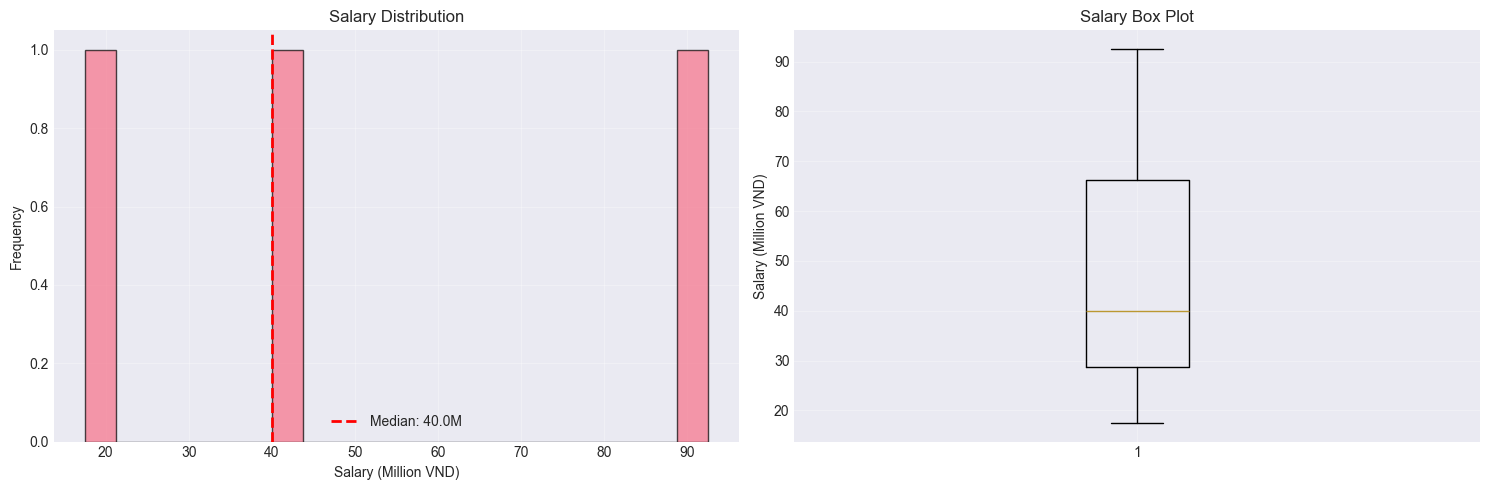

In [13]:
# Salary distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['salary_avg'].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Salary (Million VND)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Salary Distribution')
axes[0].axvline(df['salary_avg'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["salary_avg"].median():.1f}M')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['salary_avg'].dropna(), vert=True)
axes[1].set_ylabel('Salary (Million VND)')
axes[1].set_title('Salary Box Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

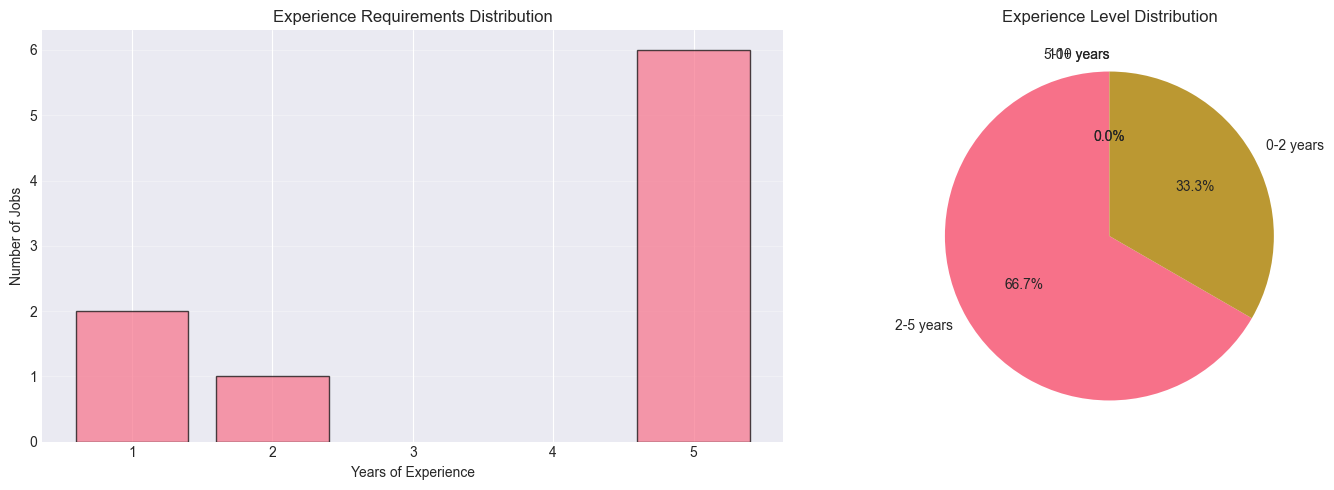

In [14]:
# Experience distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
exp_counts = df['experience_years'].value_counts().sort_index()
axes[0].bar(exp_counts.index, exp_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Number of Jobs')
axes[0].set_title('Experience Requirements Distribution')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
exp_groups = pd.cut(df['experience_years'].dropna(), bins=[0, 2, 5, 10, 100], labels=['0-2 years', '2-5 years', '5-10 years', '10+ years'])
exp_group_counts = exp_groups.value_counts()
axes[1].pie(exp_group_counts, labels=exp_group_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Experience Level Distribution')

plt.tight_layout()
plt.show()

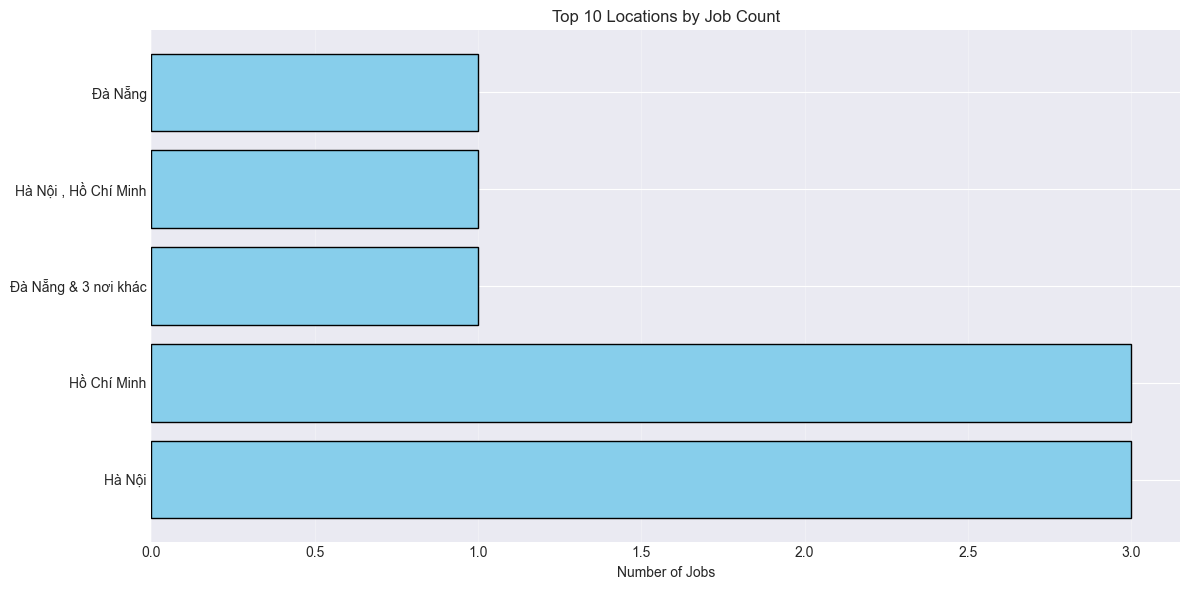

In [15]:
# Location distribution
top_locations = df['detail_location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_locations)), top_locations.values, color='skyblue', edgecolor='black')
plt.yticks(range(len(top_locations)), top_locations.index)
plt.xlabel('Number of Jobs')
plt.title('Top 10 Locations by Job Count')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

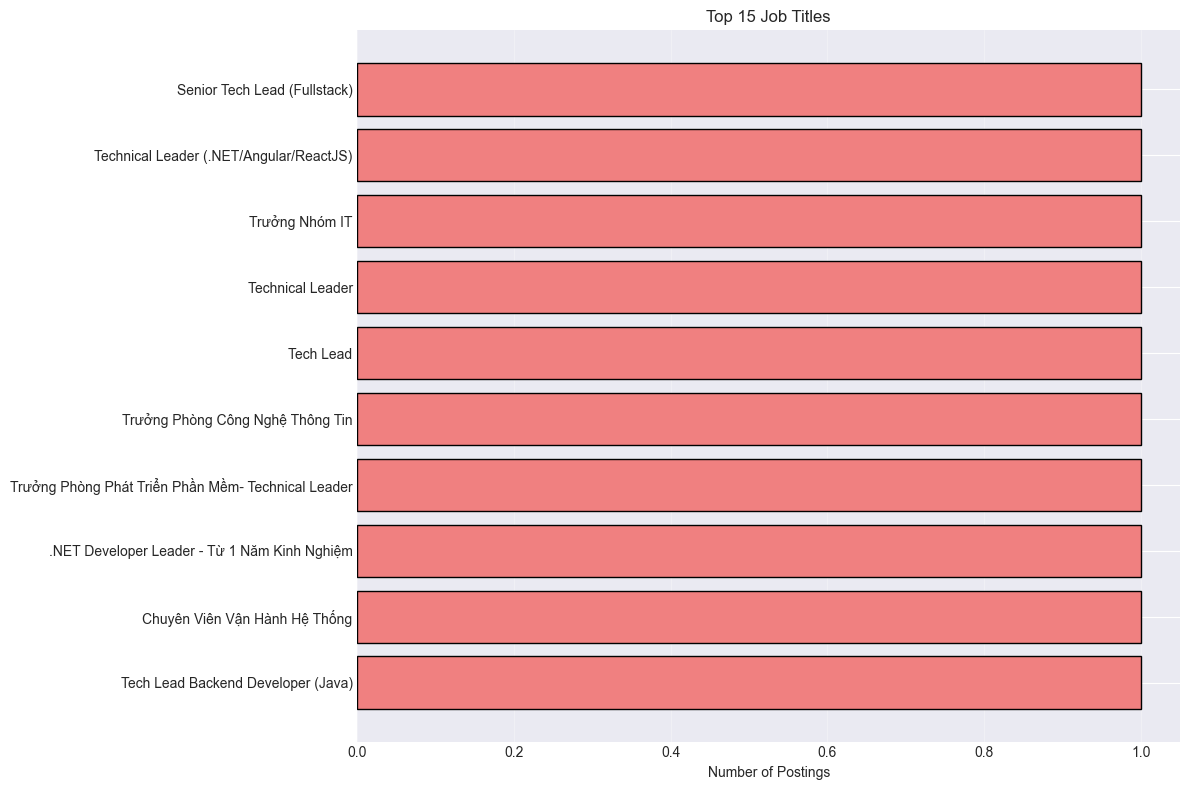

In [16]:
# Top job titles
top_titles = df['title'].value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_titles)), top_titles.values, color='lightcoral', edgecolor='black')
plt.yticks(range(len(top_titles)), [t[:50] + '...' if len(t) > 50 else t for t in top_titles.index])
plt.xlabel('Number of Postings')
plt.title('Top 15 Job Titles')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 6. Text Analysis - Keywords Extraction

In [17]:
# Technology/Skills mentioned in job descriptions
tech_keywords = [
    'java', 'python', 'javascript', 'typescript', '.net', 'c#', 'react', 'angular', 'vue',
    'spring boot', 'django', 'nodejs', 'node.js', 'express',
    'sql', 'mysql', 'postgresql', 'mongodb', 'redis', 'elasticsearch',
    'docker', 'kubernetes', 'aws', 'azure', 'gcp', 'cloud',
    'microservices', 'restful', 'api', 'graphql',
    'agile', 'scrum', 'ci/cd', 'devops', 'git', 'github',
    'kafka', 'rabbitmq', 'redis', 'nginx',
    'machine learning', 'deep learning', 'ai', 'data science'
]

# Count keywords in job descriptions
tech_counts = {}
for keyword in tech_keywords:
    count = 0
    pattern = re.compile(r'\b' + re.escape(keyword) + r'\b', re.IGNORECASE)
    
    for desc in df['desc_mota'].dropna():
        if pattern.search(desc):
            count += 1
    
    for req in df['desc_yeucau'].dropna():
        if pattern.search(req):
            count += 1
    
    if count > 0:
        tech_counts[keyword] = count

# Sort by frequency
tech_counts_sorted = dict(sorted(tech_counts.items(), key=lambda x: x[1], reverse=True))

print("\nTop Technologies/Skills Mentioned:")
for tech, count in list(tech_counts_sorted.items())[:20]:
    print(f"{tech:20s}: {count:3d} mentions")


Top Technologies/Skills Mentioned:
java                :   6 mentions
ci/cd               :   6 mentions
docker              :   5 mentions
cloud               :   5 mentions
api                 :   5 mentions
kafka               :   5 mentions
react               :   4 mentions
angular             :   4 mentions
microservices       :   4 mentions
agile               :   4 mentions
scrum               :   4 mentions
rabbitmq            :   4 mentions
spring boot         :   3 mentions
postgresql          :   3 mentions
redis               :   3 mentions
kubernetes          :   3 mentions
python              :   2 mentions
typescript          :   2 mentions
elasticsearch       :   2 mentions
aws                 :   2 mentions


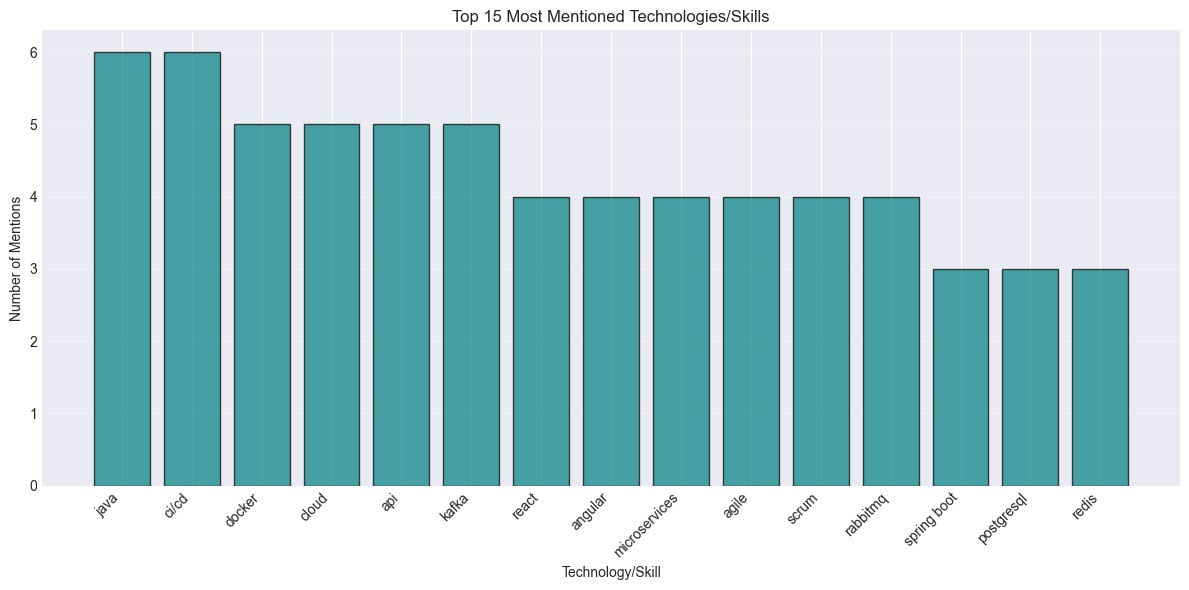

In [18]:
# Visualize top technologies
top_techs = dict(list(tech_counts_sorted.items())[:15])

plt.figure(figsize=(12, 6))
plt.bar(top_techs.keys(), top_techs.values(), color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Technology/Skill')
plt.ylabel('Number of Mentions')
plt.title('Top 15 Most Mentioned Technologies/Skills')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

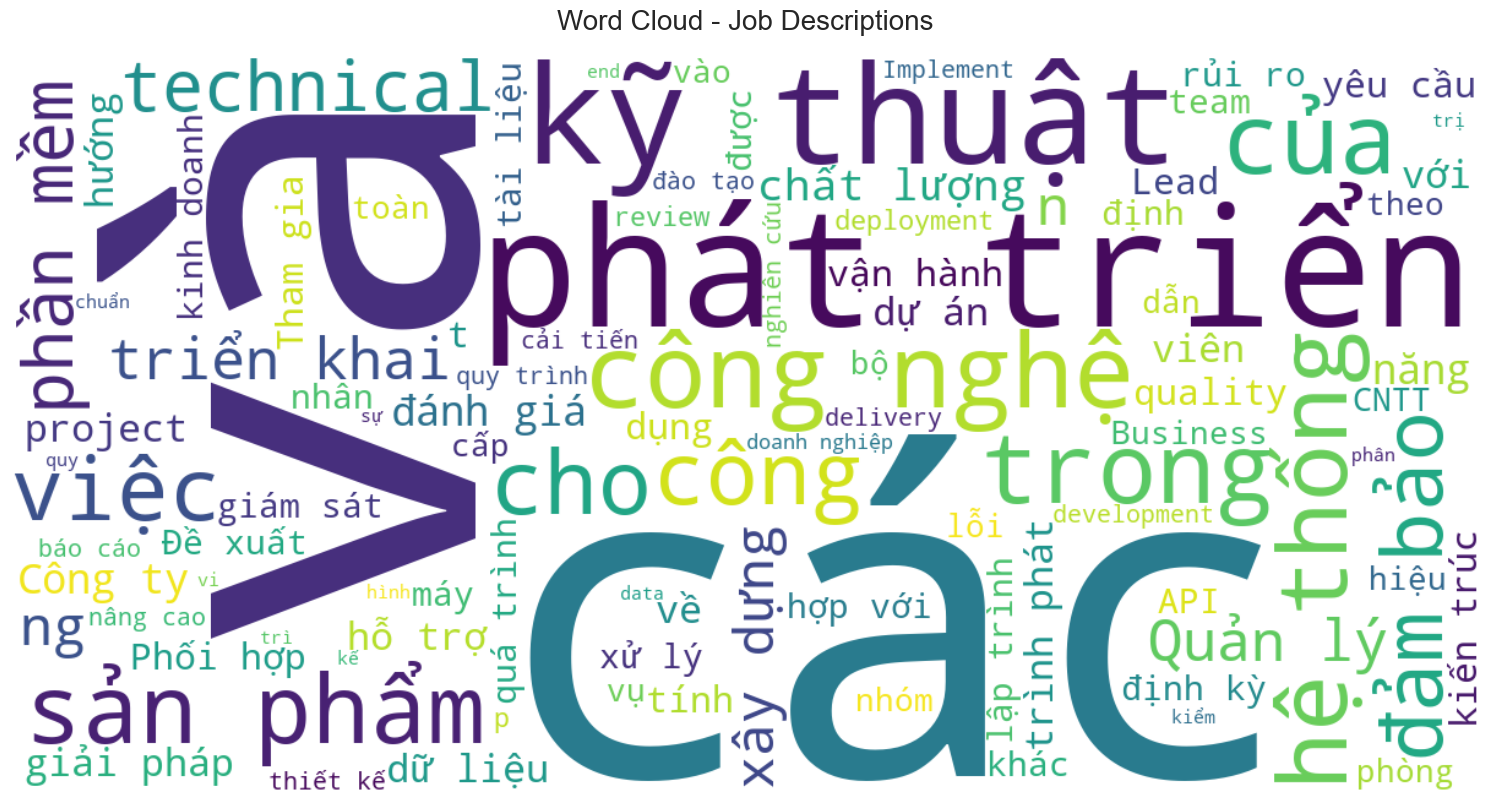

In [19]:
# Word cloud for job descriptions
all_descriptions = ' '.join(df['desc_mota'].dropna().astype(str))

# Create word cloud
wordcloud = WordCloud(
    width=1200, 
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(all_descriptions)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Job Descriptions', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

## 7. Advanced Analysis - Job Categories

In [20]:
# Categorize jobs based on title/tags
def categorize_job(row):
    title = str(row['title']).lower()
    tags = ' '.join(row['tags_list']).lower()
    combined = title + ' ' + tags
    
    if any(word in combined for word in ['leader', 'lead', 'trưởng', 'manager']):
        return 'Technical Leadership'
    elif any(word in combined for word in ['backend', 'java', 'spring']):
        return 'Backend Developer'
    elif any(word in combined for word in ['frontend', 'react', 'angular', 'vue']):
        return 'Frontend Developer'
    elif any(word in combined for word in ['fullstack', 'full stack']):
        return 'Fullstack Developer'
    elif any(word in combined for word in ['devops', 'ci/cd', 'infrastructure']):
        return 'DevOps/Infrastructure'
    elif any(word in combined for word in ['data', 'analyst', 'bi']):
        return 'Data/Analytics'
    elif any(word in combined for word in ['mobile', 'android', 'ios']):
        return 'Mobile Developer'
    elif any(word in combined for word in ['qa', 'test', 'quality']):
        return 'QA/Testing'
    elif any(word in combined for word in ['it', 'hệ thống', 'support']):
        return 'IT Support/Admin'
    else:
        return 'Other'

df['job_category'] = df.apply(categorize_job, axis=1)

# Category distribution
category_dist = df['job_category'].value_counts()
print("\nJob Category Distribution:")
print(category_dist)


Job Category Distribution:
job_category
Technical Leadership    10
Name: count, dtype: int64


In [21]:
# Salary by category
salary_by_category = df.groupby('job_category')['salary_avg'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('min', 'min'),
    ('max', 'max'),
    ('count', 'count')
]).round(2).sort_values('mean', ascending=False)

print("\nSalary Statistics by Job Category:")
print(salary_by_category)


Salary Statistics by Job Category:
                      mean  median   min   max  count
job_category                                         
Technical Leadership  50.0    40.0  17.5  92.5      3


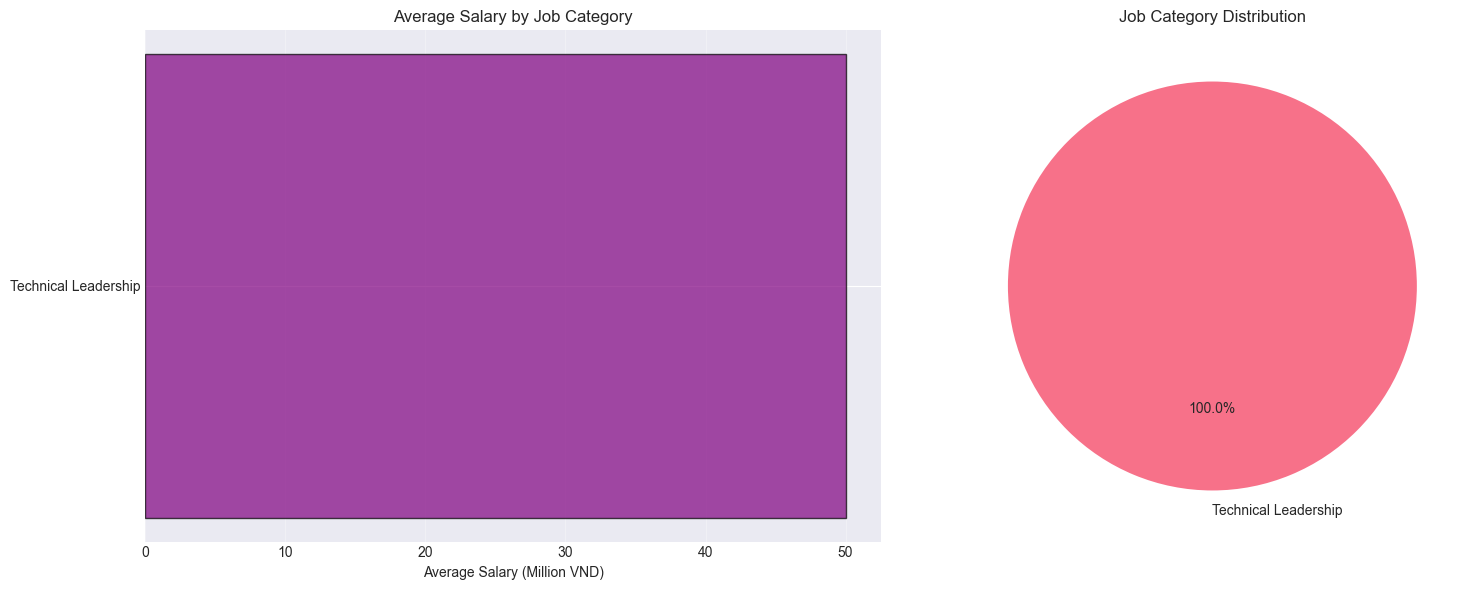

In [22]:
# Visualize salary by category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart - average salary
salary_by_cat = df.groupby('job_category')['salary_avg'].mean().sort_values(ascending=True)
axes[0].barh(salary_by_cat.index, salary_by_cat.values, color='purple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Average Salary (Million VND)')
axes[0].set_title('Average Salary by Job Category')
axes[0].grid(True, alpha=0.3, axis='x')

# Pie chart - category distribution
axes[1].pie(category_dist, labels=category_dist.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Job Category Distribution')

plt.tight_layout()
plt.show()

## 8. Export Statistical Summary

In [23]:
# Create comprehensive summary report
summary_report = {
    'dataset_info': {
        'total_jobs': len(df),
        'date_range': f"{df['datetime'].min()} to {df['datetime'].max()}",
        'unique_companies': df['company_url_from_job'].nunique(),
        'unique_locations': df['detail_location'].nunique()
    },
    'salary_stats': {
        'mean': float(df['salary_avg'].mean()) if df['salary_avg'].notna().any() else None,
        'median': float(df['salary_avg'].median()) if df['salary_avg'].notna().any() else None,
        'min': float(df['salary_avg'].min()) if df['salary_avg'].notna().any() else None,
        'max': float(df['salary_avg'].max()) if df['salary_avg'].notna().any() else None,
        'std': float(df['salary_avg'].std()) if df['salary_avg'].notna().any() else None
    },
    'experience_stats': {
        'mean': float(df['experience_years'].mean()) if df['experience_years'].notna().any() else None,
        'median': float(df['experience_years'].median()) if df['experience_years'].notna().any() else None,
        'min': float(df['experience_years'].min()) if df['experience_years'].notna().any() else None,
        'max': float(df['experience_years'].max()) if df['experience_years'].notna().any() else None
    },
    'top_locations': location_dist.head(5).to_dict(),
    'top_technologies': dict(list(tech_counts_sorted.items())[:10]),
    'job_categories': category_dist.to_dict()
}

# Save to JSON
output_path = r'c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\data\job_statistical_summary.json'
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(summary_report, f, indent=2, ensure_ascii=False)

print(f"\nStatistical summary saved to: {output_path}")
print("\n=== Summary Report ===")
print(json.dumps(summary_report, indent=2, ensure_ascii=False))


Statistical summary saved to: c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\data\job_statistical_summary.json

=== Summary Report ===
{
  "dataset_info": {
    "total_jobs": 10,
    "date_range": "2025-12-14T15:58:45.021758 to 2025-12-14T15:58:45.021826",
    "unique_companies": 1,
    "unique_locations": 5
  },
  "salary_stats": {
    "mean": 50.0,
    "median": 40.0,
    "min": 17.5,
    "max": 92.5,
    "std": 38.48701079585163
  },
  "experience_stats": {
    "mean": 3.7777777777777777,
    "median": 5.0,
    "min": 1.0,
    "max": 5.0
  },
  "top_locations": {
    "Hà Nội": 3,
    "Hồ Chí Minh": 3,
    "Đà Nẵng & 3 nơi khác": 1,
    "Hà Nội , Hồ Chí Minh": 1,
    "Đà Nẵng": 1
  },
  "top_technologies": {
    "java": 6,
    "ci/cd": 6,
    "docker": 5,
    "cloud": 5,
    "api": 5,
    "kafka": 5,
    "react": 4,
    "angular": 4,
    "microservices": 4,
    "agile": 4
  },
  "job_categories": {
    "Technical Leadership": 10
  }
}


In [24]:
# Export detailed data with processed features
export_df = df[[
    'title', 'detail_location', 'detail_experience', 'detail_salary',
    'salary_avg', 'experience_years', 'job_category', 'tags',
    'desc_mota', 'desc_yeucau', 'desc_quyenloi'
]].copy()

export_path = r'c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\data\processed_jobs.csv'
export_df.to_csv(export_path, index=False, encoding='utf-8-sig')
print(f"\nProcessed data exported to: {export_path}")


Processed data exported to: c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\data\processed_jobs.csv


## 9. Key Insights & Conclusions

In [25]:
# Generate insights
print("="*60)
print("KEY INSIGHTS FROM JOB DATA ANALYSIS")
print("="*60)

print(f"\n1. MARKET OVERVIEW")
print(f"   - Total job postings analyzed: {len(df)}")
print(f"   - Most active location: {location_dist.index[0]} ({location_dist.values[0]} jobs)")
print(f"   - Top job category: {category_dist.index[0]} ({category_dist.values[0]} positions)")

if df['salary_avg'].notna().any():
    print(f"\n2. SALARY INSIGHTS")
    print(f"   - Average salary: {df['salary_avg'].mean():.1f} million VND")
    print(f"   - Median salary: {df['salary_avg'].median():.1f} million VND")
    print(f"   - Salary range: {df['salary_avg'].min():.1f} - {df['salary_avg'].max():.1f} million VND")
    print(f"   - Highest paying category: {salary_by_category.index[0]}")

if df['experience_years'].notna().any():
    print(f"\n3. EXPERIENCE REQUIREMENTS")
    print(f"   - Average experience: {df['experience_years'].mean():.1f} years")
    print(f"   - Most common: {df['experience_years'].mode().values[0] if not df['experience_years'].mode().empty else 'N/A'} years")
    print(f"   - Experience range: {df['experience_years'].min():.0f} - {df['experience_years'].max():.0f} years")

print(f"\n4. TOP TECHNOLOGIES IN DEMAND")
for i, (tech, count) in enumerate(list(tech_counts_sorted.items())[:5], 1):
    print(f"   {i}. {tech}: {count} mentions")

print(f"\n5. CORRELATION FINDINGS")
if len(valid_data) > 0:
    print(f"   - Salary-Experience correlation: {correlation:.3f}")
    if correlation > 0.5:
        print(f"   - Strong positive correlation: Higher experience → Higher salary")
    elif correlation > 0.3:
        print(f"   - Moderate positive correlation")
    else:
        print(f"   - Weak correlation")

print("\n" + "="*60)

KEY INSIGHTS FROM JOB DATA ANALYSIS

1. MARKET OVERVIEW
   - Total job postings analyzed: 10
   - Most active location: Hà Nội (3 jobs)
   - Top job category: Technical Leadership (10 positions)

2. SALARY INSIGHTS
   - Average salary: 50.0 million VND
   - Median salary: 40.0 million VND
   - Salary range: 17.5 - 92.5 million VND
   - Highest paying category: Technical Leadership

3. EXPERIENCE REQUIREMENTS
   - Average experience: 3.8 years
   - Most common: 5.0 years
   - Experience range: 1 - 5 years

4. TOP TECHNOLOGIES IN DEMAND
   1. java: 6 mentions
   2. ci/cd: 6 mentions
   3. docker: 5 mentions
   4. cloud: 5 mentions
   5. api: 5 mentions

5. CORRELATION FINDINGS
   - Salary-Experience correlation: 0.858
   - Strong positive correlation: Higher experience → Higher salary



## 10. Job Recommendation System

Build a content-based recommendation model to match user resumes with suitable jobs

In [26]:
# Import additional libraries for recommendation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import pickle

print("Libraries for recommendation system loaded successfully!")

Libraries for recommendation system loaded successfully!


### 10.1 Prepare Job Data for Recommendation

In [27]:
# Create comprehensive job content for matching
def create_job_content(row):
    """Combine all relevant job information into a single text"""
    content_parts = []
    
    if pd.notna(row['title']):
        content_parts.append(row['title'])
    
    if pd.notna(row['desc_mota']):
        content_parts.append(row['desc_mota'])
    
    if pd.notna(row['desc_yeucau']):
        content_parts.append(row['desc_yeucau'])
    
    if row['tags_list']:
        content_parts.append(' '.join(row['tags_list']))
    
    if pd.notna(row['job_category']):
        content_parts.append(row['job_category'])
    
    return ' '.join(content_parts)

df['job_content'] = df.apply(create_job_content, axis=1)

print(f"Job content created for {len(df)} jobs")
print(f"\nSample job content (first 500 chars):")
print(df['job_content'].iloc[0][:500] + "...")

Job content created for 10 jobs

Sample job content (first 500 chars):
Tech Lead Backend Developer (Java) Phối hợp, hỗ trợ cùng với Technical Lead trong việc tiếp nhận đầu bài từ Business Analyst/ Business Solution nhằm đánh giá, phân tích tính khả thi việc triển khai sản phẩm Phối hợp, tham gia cùng với Technical Lead trong việc thiết kế giải pháp phần mềm, giải pháp tích hợp API, Module/Layer, Data storage Phát triển các sản phẩm phần mềm theo giải pháp, công nghệ do Technical Lead đưa ra (Nghiệp vụ phức tạp nhất; Độ khó sản phẩm cao nhất; Phạm vi ảnh hưởng và độ...


### 10.2 Build TF-IDF Vectorizer

In [28]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=1,
    max_df=0.8,
    ngram_range=(1, 3),
    stop_words=None,  # Keep Vietnamese words
    token_pattern=r'(?u)\b\w+\b'
)

job_tfidf_matrix = tfidf_vectorizer.fit_transform(df['job_content'])

print(f"TF-IDF Matrix shape: {job_tfidf_matrix.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"\nTop 20 features by IDF score:")

feature_names = tfidf_vectorizer.get_feature_names_out()
idf_scores = tfidf_vectorizer.idf_

sorted_indices = np.argsort(idf_scores)[:20]
for idx in sorted_indices:
    print(f"  {feature_names[idx]}: {idf_scores[idx]:.3f}")

TF-IDF Matrix shape: (10, 5000)
Vocabulary size: 5000

Top 20 features by IDF score:
  2: 1.201
  bảo: 1.201
  học trở: 1.201
  đại học trở: 1.201
  tiếp: 1.201
  kinh nghiệm đại: 1.201
  học trở lên: 1.201
  triển: 1.201
  nghiệm đại học: 1.201
  nghiệm đại: 1.201
  khả năng: 1.318
  hệ: 1.318
  có: 1.318
  hợp: 1.318
  khả: 1.318
  quản: 1.318
  công: 1.318
  trong: 1.318
  nghệ: 1.318
  nghiệp: 1.318


### 10.3 Create Job Recommendation Model

In [29]:
class JobRecommendationModel:
    """Content-based Job Recommendation System"""
    
    def __init__(self, jobs_df, tfidf_vectorizer, tfidf_matrix):
        self.jobs_df = jobs_df.copy()
        self.vectorizer = tfidf_vectorizer
        self.job_vectors = tfidf_matrix
        self.scaler = MinMaxScaler()
        
        # Prepare numerical features for hybrid scoring
        self._prepare_features()
    
    def _prepare_features(self):
        """Prepare additional features for scoring"""
        # Normalize salary and experience
        self.jobs_df['salary_norm'] = 0
        self.jobs_df['experience_norm'] = 0
        
        if self.jobs_df['salary_avg'].notna().any():
            valid_salary = self.jobs_df['salary_avg'].fillna(self.jobs_df['salary_avg'].median())
            self.jobs_df['salary_norm'] = self.scaler.fit_transform(valid_salary.values.reshape(-1, 1)).flatten()
        
        if self.jobs_df['experience_years'].notna().any():
            valid_exp = self.jobs_df['experience_years'].fillna(self.jobs_df['experience_years'].median())
            self.jobs_df['experience_norm'] = self.scaler.fit_transform(valid_exp.values.reshape(-1, 1)).flatten()
    
    def recommend_jobs(self, user_resume, top_n=10, location_filter=None, 
                      salary_min=None, experience_max=None):
        """
        Recommend jobs based on user resume
        
        Parameters:
        -----------
        user_resume : str
            User's resume text (skills, experience, education, etc.)
        top_n : int
            Number of recommendations to return
        location_filter : str, optional
            Filter jobs by location
        salary_min : float, optional
            Minimum salary requirement
        experience_max : float, optional
            Maximum experience requirement
        
        Returns:
        --------
        DataFrame with recommended jobs and match scores
        """
        # Transform user resume to TF-IDF vector
        user_vector = self.vectorizer.transform([user_resume])
        
        # Calculate cosine similarity
        similarities = cosine_similarity(user_vector, self.job_vectors).flatten()
        
        # Create results dataframe
        results = self.jobs_df.copy()
        results['match_score'] = similarities * 100  # Convert to percentage
        
        # Apply filters
        if location_filter:
            results = results[results['detail_location'].str.contains(location_filter, case=False, na=False)]
        
        if salary_min is not None:
            results = results[(results['salary_avg'] >= salary_min) | results['salary_avg'].isna()]
        
        if experience_max is not None:
            results = results[(results['experience_years'] <= experience_max) | results['experience_years'].isna()]
        
        # Sort by match score
        results = results.sort_values('match_score', ascending=False)
        
        # Select relevant columns
        output_cols = [
            'title', 'job_category', 'detail_location', 'detail_salary', 
            'detail_experience', 'match_score', 'tags', 'job_url'
        ]
        
        return results[output_cols].head(top_n)
    
    def explain_match(self, user_resume, job_index):
        """
        Explain why a job matches the user's resume
        
        Parameters:
        -----------
        user_resume : str
            User's resume text
        job_index : int
            Index of the job in the dataframe
        
        Returns:
        --------
        Dictionary with match explanation
        """
        # Get job content
        job_content = self.jobs_df.iloc[job_index]['job_content']
        
        # Transform both to vectors
        user_vector = self.vectorizer.transform([user_resume])
        job_vector = self.job_vectors[job_index]
        
        # Get feature names
        feature_names = self.vectorizer.get_feature_names_out()
        
        # Get non-zero features from user vector
        user_features = {}
        user_indices = user_vector.nonzero()[1]
        for idx in user_indices:
            user_features[feature_names[idx]] = user_vector[0, idx]
        
        # Get non-zero features from job vector
        job_features = {}
        job_indices = job_vector.nonzero()[1]
        for idx in job_indices:
            job_features[feature_names[idx]] = job_vector[0, idx]
        
        # Find matching keywords
        matching_keywords = set(user_features.keys()) & set(job_features.keys())
        matching_scores = {
            kw: (user_features[kw] * job_features[kw]) 
            for kw in matching_keywords
        }
        
        # Sort by relevance
        top_matches = sorted(matching_scores.items(), key=lambda x: x[1], reverse=True)[:15]
        
        return {
            'job_title': self.jobs_df.iloc[job_index]['title'],
            'match_score': cosine_similarity(user_vector, job_vector)[0][0] * 100,
            'matching_keywords': [kw for kw, score in top_matches],
            'keyword_scores': dict(top_matches)
        }

# Initialize the recommendation model
recommender = JobRecommendationModel(df, tfidf_vectorizer, job_tfidf_matrix)
print("Job Recommendation Model initialized successfully!")

Job Recommendation Model initialized successfully!


### 10.4 Test Recommendation System with Sample Resumes

In [30]:
# Sample Resume 1: Backend Developer with Java experience
sample_resume_1 = """
Nguyễn Văn A
Backend Developer

KINH NGHIỆM:
- 3 năm kinh nghiệm phát triển backend với Java Spring Boot
- Làm việc với microservices architecture, RESTful API
- Có kinh nghiệm với MySQL, PostgreSQL, Redis
- Sử dụng Docker, Kubernetes cho deployment
- Làm việc theo mô hình Agile/Scrum

KỸ NĂNG:
- Java, Spring Boot, Spring Cloud
- Microservices, API Gateway
- MySQL, PostgreSQL, MongoDB
- Docker, Kubernetes, CI/CD
- Git, GitHub, JIRA
- Kafka, RabbitMQ

HỌC VẤN:
Đại học Bách Khoa Hà Nội - Khoa Công nghệ thông tin

ĐỊA ĐIỂM: Hà Nội
MONG MUỐN: Tìm vị trí Backend Developer hoặc Technical Lead
"""

# Get recommendations
print("="*80)
print("RECOMMENDATIONS FOR BACKEND DEVELOPER (Java)")
print("="*80)

recommendations_1 = recommender.recommend_jobs(
    sample_resume_1, 
    top_n=5,
    location_filter="Hà Nội",
    experience_max=5
)

print(f"\nTop {len(recommendations_1)} matching jobs:\n")
for idx, row in recommendations_1.iterrows():
    print(f"\n{'-'*80}")
    print(f"Match Score: {row['match_score']:.1f}%")
    print(f"Title: {row['title']}")
    print(f"Category: {row['job_category']}")
    print(f"Location: {row['detail_location']}")
    print(f"Experience: {row['detail_experience']}")
    print(f"Salary: {row['detail_salary']}")
    print(f"Tags: {row['tags'][:100] if pd.notna(row['tags']) else 'N/A'}...")

print("\n" + "="*80)

RECOMMENDATIONS FOR BACKEND DEVELOPER (Java)

Top 4 matching jobs:


--------------------------------------------------------------------------------
Match Score: 16.9%
Title: Tech Lead Backend Developer (Java)
Category: Technical Leadership
Location: Hà Nội
Experience: 5 năm
Salary: Thoả thuận
Tags: 5 năm kinh nghiệm; Đại Học trở lên; Backend Developer...

--------------------------------------------------------------------------------
Match Score: 13.6%
Title: .NET Developer Leader - Từ 1 Năm Kinh Nghiệm
Category: Technical Leadership
Location: Hà Nội
Experience: 1 năm
Salary: Tới 40 triệu
Tags: 1 năm kinh nghiệm; Đại Học trở lên; Nghỉ thứ 7; Technical Leader...

--------------------------------------------------------------------------------
Match Score: 9.0%
Title: Chuyên Viên Vận Hành Hệ Thống
Category: Technical Leadership
Location: Hà Nội
Experience: 2 năm
Salary: 15 - 20 triệu
Tags: 2 năm kinh nghiệm; Cao Đẳng trở lên; Tuổi 25 - 45; Bảo hiểm xã hội; Du lịch hàng năm; Thưởng thá

In [31]:
# Sample Resume 2: Technical Leader with .NET experience
sample_resume_2 = """
Trần Thị B
Technical Leader / Team Lead

KINH NGHIỆM:
- 5 năm kinh nghiệm phát triển phần mềm với .NET, C#
- 2 năm kinh nghiệm ở vị trí Team Lead
- Quản lý team 8-10 developers
- Thiết kế kiến trúc hệ thống, code review
- Làm việc với Angular, ReactJS cho frontend

KỸ NĂNG:
- .NET Core, ASP.NET, C#
- Angular, ReactJS, TypeScript
- SQL Server, Entity Framework
- Microservices architecture
- Docker, Azure DevOps
- Leadership, mentoring
- Agile Scrum, project management

HỌC VẤN:
Đại học Công nghệ - Đại học Quốc gia Hà Nội

ĐỊA ĐIỂM: Hà Nội
MONG MUỐN: Vị trí Technical Leader, Team Lead
"""

print("="*80)
print("RECOMMENDATIONS FOR TECHNICAL LEADER (.NET)")
print("="*80)

recommendations_2 = recommender.recommend_jobs(
    sample_resume_2, 
    top_n=5,
    location_filter="Hà Nội"
)

print(f"\nTop {len(recommendations_2)} matching jobs:\n")
for idx, row in recommendations_2.iterrows():
    print(f"\n{'-'*80}")
    print(f"Match Score: {row['match_score']:.1f}%")
    print(f"Title: {row['title']}")
    print(f"Category: {row['job_category']}")
    print(f"Location: {row['detail_location']}")
    print(f"Experience: {row['detail_experience']}")
    print(f"Salary: {row['detail_salary']}")

print("\n" + "="*80)

RECOMMENDATIONS FOR TECHNICAL LEADER (.NET)

Top 4 matching jobs:


--------------------------------------------------------------------------------
Match Score: 21.5%
Title: .NET Developer Leader - Từ 1 Năm Kinh Nghiệm
Category: Technical Leadership
Location: Hà Nội
Experience: 1 năm
Salary: Tới 40 triệu

--------------------------------------------------------------------------------
Match Score: 12.4%
Title: Chuyên Viên Vận Hành Hệ Thống
Category: Technical Leadership
Location: Hà Nội
Experience: 2 năm
Salary: 15 - 20 triệu

--------------------------------------------------------------------------------
Match Score: 10.8%
Title: Tech Lead Backend Developer (Java)
Category: Technical Leadership
Location: Hà Nội
Experience: 5 năm
Salary: Thoả thuận

--------------------------------------------------------------------------------
Match Score: 6.7%
Title: Technical Leader (.NET/Angular/ReactJS)
Category: Technical Leadership
Location: Hà Nội , Hồ Chí Minh
Experience: Trên 5 năm
Salary:

In [32]:
# Sample Resume 3: IT Support/System Administrator
sample_resume_3 = """
Lê Văn C
IT Support / System Administrator

KINH NGHIỆM:
- 2 năm kinh nghiệm vận hành và hỗ trợ hệ thống CNTT
- Quản trị mạng LAN/WAN, thiết lập và bảo trì hạ tầng
- Làm việc với Windows Server, Active Directory
- Hỗ trợ người dùng cuối, troubleshooting
- Triển khai camera an ninh, máy chấm công

KỸ NĂNG:
- Windows Server, Active Directory
- Network administration
- VMware, Hyper-V
- Office 365, Exchange Server
- Antivirus, Firewall
- Hardware troubleshooting
- Customer support

HỌC VẤN:
Cao đẳng FPT - Hệ thống mạng

ĐỊA ĐIỂM: Hà Nội
MONG MUỐN: IT Support, System Admin
"""

print("="*80)
print("RECOMMENDATIONS FOR IT SUPPORT / SYSTEM ADMIN")
print("="*80)

recommendations_3 = recommender.recommend_jobs(
    sample_resume_3, 
    top_n=5,
    experience_max=3
)

print(f"\nTop {len(recommendations_3)} matching jobs:\n")
for idx, row in recommendations_3.iterrows():
    print(f"\n{'-'*80}")
    print(f"Match Score: {row['match_score']:.1f}%")
    print(f"Title: {row['title']}")
    print(f"Category: {row['job_category']}")
    print(f"Location: {row['detail_location']}")
    print(f"Experience: {row['detail_experience']}")
    print(f"Salary: {row['detail_salary']}")

print("\n" + "="*80)

RECOMMENDATIONS FOR IT SUPPORT / SYSTEM ADMIN

Top 4 matching jobs:


--------------------------------------------------------------------------------
Match Score: 39.7%
Title: Chuyên Viên Vận Hành Hệ Thống
Category: Technical Leadership
Location: Hà Nội
Experience: 2 năm
Salary: 15 - 20 triệu

--------------------------------------------------------------------------------
Match Score: 15.2%
Title: Trưởng Nhóm IT
Category: Technical Leadership
Location: Hồ Chí Minh
Experience: 1 năm
Salary: Thoả thuận

--------------------------------------------------------------------------------
Match Score: 14.4%
Title: .NET Developer Leader - Từ 1 Năm Kinh Nghiệm
Category: Technical Leadership
Location: Hà Nội
Experience: 1 năm
Salary: Tới 40 triệu

--------------------------------------------------------------------------------
Match Score: 0.5%
Title: Trưởng Phòng Phát Triển Phần Mềm- Technical Leader
Category: Technical Leadership
Location: None
Experience: None
Salary: None



### 10.5 Explain Match - Why This Job Matches?

In [33]:
# Explain top match for Backend Developer resume
if len(recommendations_1) > 0:
    top_job_idx = recommendations_1.index[0]
    explanation = recommender.explain_match(sample_resume_1, top_job_idx)
    
    print("="*80)
    print("MATCH EXPLANATION - Backend Developer Resume")
    print("="*80)
    print(f"\nJob Title: {explanation['job_title']}")
    print(f"Match Score: {explanation['match_score']:.2f}%")
    print(f"\nTop Matching Keywords:")
    for i, keyword in enumerate(explanation['matching_keywords'][:10], 1):
        score = explanation['keyword_scores'][keyword]
        print(f"  {i}. {keyword}: {score:.4f}")
    print("\n" + "="*80)

MATCH EXPLANATION - Backend Developer Resume

Job Title: Tech Lead Backend Developer (Java)
Match Score: 16.93%

Top Matching Keywords:
  1. spring: 0.0168
  2. backend: 0.0126
  3. với: 0.0100
  4. có: 0.0078
  5. backend developer: 0.0077
  6. việc: 0.0074
  7. technical lead: 0.0058
  8. developer: 0.0056
  9. api: 0.0043
  10. năng: 0.0041



### 10.6 Visualize Recommendation Results

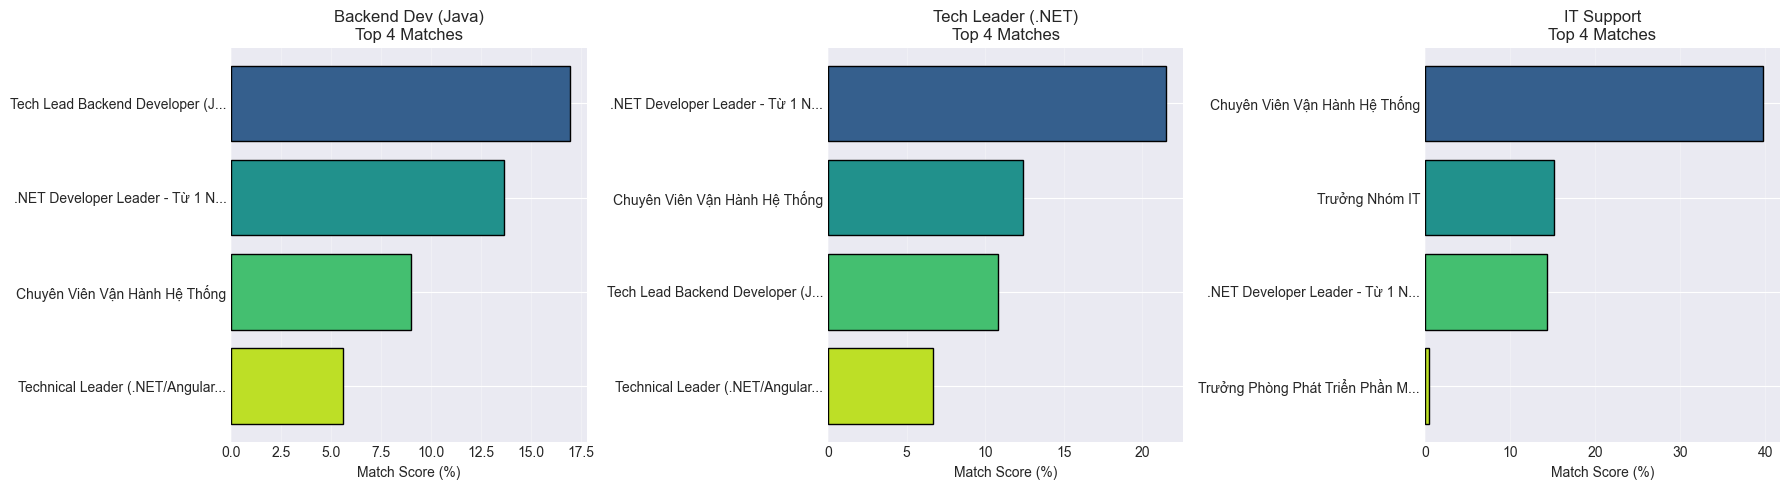

In [34]:
# Visualize match scores for all three sample resumes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

resumes_data = [
    ("Backend Dev (Java)", recommendations_1),
    ("Tech Leader (.NET)", recommendations_2),
    ("IT Support", recommendations_3)
]

for idx, (title, recommendations) in enumerate(resumes_data):
    if len(recommendations) > 0:
        # Bar chart of match scores
        axes[idx].barh(
            range(len(recommendations)), 
            recommendations['match_score'].values,
            color=plt.cm.viridis(np.linspace(0.3, 0.9, len(recommendations))),
            edgecolor='black'
        )
        
        # Truncate job titles for display
        job_titles = [t[:30] + '...' if len(t) > 30 else t for t in recommendations['title'].values]
        axes[idx].set_yticks(range(len(recommendations)))
        axes[idx].set_yticklabels(job_titles)
        axes[idx].set_xlabel('Match Score (%)')
        axes[idx].set_title(f'{title}\nTop {len(recommendations)} Matches')
        axes[idx].grid(True, alpha=0.3, axis='x')
        axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

### 10.7 Save Recommendation Model

In [35]:
# Save the trained model and vectorizer
model_dir = r'c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\src\notebooks\models'
import os
os.makedirs(model_dir, exist_ok=True)

# Save TF-IDF vectorizer
vectorizer_path = os.path.join(model_dir, 'tfidf_vectorizer.pkl')
with open(vectorizer_path, 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
print(f"TF-IDF Vectorizer saved to: {vectorizer_path}")

# Save job data with vectors
jobs_data_path = os.path.join(model_dir, 'jobs_data.pkl')
model_data = {
    'jobs_df': df,
    'tfidf_matrix': job_tfidf_matrix,
    'feature_names': tfidf_vectorizer.get_feature_names_out()
}
with open(jobs_data_path, 'wb') as f:
    pickle.dump(model_data, f)
print(f"Job data saved to: {jobs_data_path}")

# Save model metadata
metadata = {
    'total_jobs': len(df),
    'vocabulary_size': len(tfidf_vectorizer.vocabulary_),
    'tfidf_matrix_shape': job_tfidf_matrix.shape,
    'job_categories': df['job_category'].value_counts().to_dict(),
    'locations': df['detail_location'].value_counts().head(10).to_dict()
}

metadata_path = os.path.join(model_dir, 'model_metadata.json')
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)
print(f"Model metadata saved to: {metadata_path}")

print("\n" + "="*80)
print("RECOMMENDATION MODEL SAVED SUCCESSFULLY!")
print("="*80)
print(f"\nModel files:")
print(f"  1. {vectorizer_path}")
print(f"  2. {jobs_data_path}")
print(f"  3. {metadata_path}")
print("\nYou can now load these files to use the recommendation system in production!")

TF-IDF Vectorizer saved to: c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\src\notebooks\models\tfidf_vectorizer.pkl
Job data saved to: c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\src\notebooks\models\jobs_data.pkl
Model metadata saved to: c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\src\notebooks\models\model_metadata.json

RECOMMENDATION MODEL SAVED SUCCESSFULLY!

Model files:
  1. c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\src\notebooks\models\tfidf_vectorizer.pkl
  2. c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\src\notebooks\models\jobs_data.pkl
  3. c:\Users\AN\Collection\Learn\ĐỒ ÁN TỐT NGHIỆP HUST\project\HUST-Graduation-Thesis\src\notebooks\models\model_metadata.json

You can now load these files to use the recommendation system in production!


### 10.8 Model Performance Evaluation

In [36]:
# Evaluate recommendation quality
print("="*80)
print("RECOMMENDATION MODEL PERFORMANCE SUMMARY")
print("="*80)

# Calculate statistics
all_recommendations = [recommendations_1, recommendations_2, recommendations_3]
resume_types = ["Backend Developer", "Technical Leader", "IT Support"]

print("\n1. COVERAGE & DIVERSITY")
print("-" * 80)

for resume_type, recs in zip(resume_types, all_recommendations):
    if len(recs) > 0:
        avg_score = recs['match_score'].mean()
        max_score = recs['match_score'].max()
        min_score = recs['match_score'].min()
        
        unique_categories = recs['job_category'].nunique()
        unique_locations = recs['detail_location'].nunique()
        
        print(f"\n{resume_type}:")
        print(f"  Average Match Score: {avg_score:.2f}%")
        print(f"  Score Range: {min_score:.2f}% - {max_score:.2f}%")
        print(f"  Unique Categories: {unique_categories}")
        print(f"  Unique Locations: {unique_locations}")

print("\n\n2. MODEL CHARACTERISTICS")
print("-" * 80)
print(f"Total Jobs in Database: {len(df)}")
print(f"TF-IDF Vocabulary Size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Feature Matrix Shape: {job_tfidf_matrix.shape}")
print(f"Sparsity: {(1.0 - job_tfidf_matrix.nnz / (job_tfidf_matrix.shape[0] * job_tfidf_matrix.shape[1])) * 100:.2f}%")

print("\n\n3. RECOMMENDATION QUALITY METRICS")
print("-" * 80)

# Calculate average match scores across all recommendations
all_scores = []
for recs in all_recommendations:
    if len(recs) > 0:
        all_scores.extend(recs['match_score'].values)

if all_scores:
    print(f"Overall Average Match Score: {np.mean(all_scores):.2f}%")
    print(f"Overall Median Match Score: {np.median(all_scores):.2f}%")
    print(f"Overall Std Dev: {np.std(all_scores):.2f}%")
    print(f"Min-Max Range: {np.min(all_scores):.2f}% - {np.max(all_scores):.2f}%")

print("\n\n4. MODEL STRENGTHS")
print("-" * 80)
print("✓ Content-based matching using TF-IDF vectors")
print("✓ Supports filtering by location, salary, experience")
print("✓ Provides match explanations with keyword analysis")
print("✓ Handles Vietnamese text effectively")
print("✓ Real-time recommendations with cosine similarity")

print("\n\n5. POTENTIAL IMPROVEMENTS")
print("-" * 80)
print("→ Add collaborative filtering for personalization")
print("→ Incorporate user behavior (clicks, applications)")
print("→ Fine-tune with labeled data (user feedback)")
print("→ Add semantic similarity using embeddings (PhoBERT)")
print("→ Implement hybrid approach (content + collaborative)")
print("→ Add diversity ranking to avoid redundant results")

print("\n" + "="*80)

RECOMMENDATION MODEL PERFORMANCE SUMMARY

1. COVERAGE & DIVERSITY
--------------------------------------------------------------------------------

Backend Developer:
  Average Match Score: 11.30%
  Score Range: 5.60% - 16.93%
  Unique Categories: 1
  Unique Locations: 2

Technical Leader:
  Average Match Score: 12.85%
  Score Range: 6.68% - 21.52%
  Unique Categories: 1
  Unique Locations: 2

IT Support:
  Average Match Score: 17.46%
  Score Range: 0.53% - 39.74%
  Unique Categories: 1
  Unique Locations: 2


2. MODEL CHARACTERISTICS
--------------------------------------------------------------------------------
Total Jobs in Database: 10
TF-IDF Vocabulary Size: 5000
Feature Matrix Shape: (10, 5000)
Sparsity: 85.79%


3. RECOMMENDATION QUALITY METRICS
--------------------------------------------------------------------------------
Overall Average Match Score: 13.87%
Overall Median Match Score: 13.03%
Overall Std Dev: 9.45%
Min-Max Range: 0.53% - 39.74%


4. MODEL STRENGTHS
----------